In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


import pickle
import json


import warnings
warnings.filterwarnings('ignore')




### 1. Problem Statement

                        To predict classify rain will be happend or not in city

## 2. Data Gatering

In [2]:
df=pd.read_csv('Weather_and _Forcast.csv')
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614189,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain


In [3]:
print(df.isna().sum())


Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


In [4]:
#1
df=df.fillna(0)    # fro replace NaN values with the most frequent values(mode) for catogorical data.

<function matplotlib.pyplot.show(close=None, block=None)>

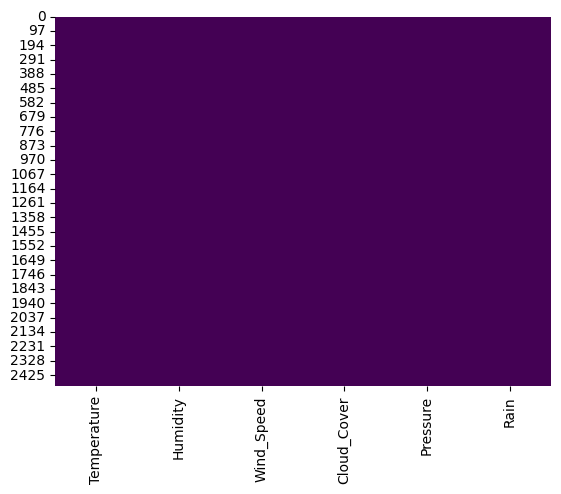

In [5]:
# 3 heatmap
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.show     

### 3. EDA and Feature Engineering

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [7]:
df.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'],
      dtype='object')

In [8]:
df.shape

(2500, 6)

### 1.1 Rain

In [9]:
df['Rain'].value_counts()

Rain
no rain    2186
rain        314
Name: count, dtype: int64

In [10]:
df['Rain'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2500 entries, 0 to 2499
Series name: Rain
Non-Null Count  Dtype 
--------------  ----- 
2500 non-null   object
dtypes: object(1)
memory usage: 19.7+ KB


In [11]:
df['Rain'].replace({'no rain': 0, 'rain':1}, inplace=True)
df['Rain']

0       1
1       0
2       0
3       1
4       0
       ..
2495    0
2496    0
2497    0
2498    0
2499    0
Name: Rain, Length: 2500, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 117.3 KB


### Model Training

In [13]:
x=df.drop('Rain', axis=1)
y=df['Rain']

In [14]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=12, shuffle=True)


y_train.value_counts()

Rain
0    1752
1     248
Name: count, dtype: int64

In [15]:
logistic_clf_model=LogisticRegression()
logistic_clf_model.fit(x_train, y_train)

LogisticRegression()

### Model Evaluations

In [16]:
#Trainin Data
y_pred_train=logistic_clf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*40)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*40)
clf_report = classification_report(y_train, y_pred_train)
print("classification report:\n",clf_report)

Confusion Matrix:
 [[1702   50]
 [  88  160]]
****************************************
Accuracy : 0.931
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1752
           1       0.76      0.65      0.70       248

    accuracy                           0.93      2000
   macro avg       0.86      0.81      0.83      2000
weighted avg       0.93      0.93      0.93      2000



### Testing Data Evalutions

In [17]:
y_pred_test=logistic_clf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*40)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*40)
clf_report = classification_report(y_train, y_pred_train)
print("classification report:\n",clf_report)

Confusion Matrix:
 [[1702   50]
 [  88  160]]
****************************************
Accuracy : 0.931
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1752
           1       0.76      0.65      0.70       248

    accuracy                           0.93      2000
   macro avg       0.86      0.81      0.83      2000
weighted avg       0.93      0.93      0.93      2000



In [18]:
y_pred_test_prob=logistic_clf_model.predict(x_test)
y_pred_test_prob

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [19]:
y_test

1959    0
1533    0
1161    0
780     0
145     0
       ..
2343    0
1230    0
775     0
838     0
1308    0
Name: Rain, Length: 500, dtype: int64

In [20]:
df.cov()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
Temperature,53.684875,-2.064280,-0.209927,1.415202,-1.108155,-0.645730
Humidity,-2.064280,398.191615,0.440186,4.209518,-12.932168,2.529727
Wind_Speed,-0.209927,0.440186,33.412053,-0.068111,2.191420,-0.002661
Cloud_Cover,1.415202,4.209518,-0.068111,848.155167,13.587282,3.149049
Pressure,-1.108155,-12.932168,2.191420,13.587282,407.895897,0.055384
Rain,-0.645730,2.529727,-0.002661,3.149049,0.055384,0.109869


In [21]:
y_pred_temp=np.where(y_pred_test  >=0.7, 1,0)
y_pred_temp[44]

np.int64(0)

In [22]:
y_pred_train_prob=logistic_clf_model.predict_proba(x_train)[:,1]
y_pred_train_prob

array([5.54101670e-05, 1.41660441e-05, 7.14008573e-01, ...,
       1.40932448e-02, 1.16295347e-01, 5.51863802e-02])

In [23]:
fpr, tpr, threshold= roc_curve(y_train, y_pred_train_prob)
threshold

array([           inf, 9.97895929e-01, 9.02045562e-01, 9.01804344e-01,
       8.79876550e-01, 8.79823291e-01, 8.70706670e-01, 8.67876927e-01,
       8.57351515e-01, 8.56775063e-01, 8.55200295e-01, 8.55092156e-01,
       8.02088554e-01, 8.01852549e-01, 7.97981646e-01, 7.97867904e-01,
       7.95885409e-01, 7.95118766e-01, 7.87540578e-01, 7.84670585e-01,
       7.65666174e-01, 7.62852121e-01, 7.56431749e-01, 7.49802362e-01,
       7.38645347e-01, 7.32615126e-01, 7.30952629e-01, 7.30291528e-01,
       7.23982817e-01, 7.14008573e-01, 7.09486676e-01, 7.05780001e-01,
       6.98920539e-01, 6.98134946e-01, 6.94121917e-01, 6.70931449e-01,
       6.69612305e-01, 6.64923930e-01, 6.64558116e-01, 6.64104778e-01,
       6.62586639e-01, 6.57736100e-01, 6.42950338e-01, 6.42796928e-01,
       6.37198766e-01, 6.35485326e-01, 6.26672296e-01, 6.25329136e-01,
       6.23632971e-01, 6.22245810e-01, 6.20536905e-01, 6.19057355e-01,
       6.14727868e-01, 5.94151348e-01, 5.92436805e-01, 5.91534478e-01,
      

In [24]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.70776256e-04,
       5.70776256e-04, 1.14155251e-03, 1.14155251e-03, 1.71232877e-03,
       1.71232877e-03, 2.28310502e-03, 2.28310502e-03, 2.85388128e-03,
       2.85388128e-03, 3.42465753e-03, 3.42465753e-03, 3.99543379e-03,
       3.99543379e-03, 4.56621005e-03, 4.56621005e-03, 5.13698630e-03,
       5.13698630e-03, 5.70776256e-03, 5.70776256e-03, 6.84931507e-03,
       6.84931507e-03, 7.99086758e-03, 7.99086758e-03, 8.56164384e-03,
       8.56164384e-03, 9.13242009e-03, 9.13242009e-03, 1.02739726e-02,
       1.02739726e-02, 1.08447489e-02, 1.08447489e-02, 1.42694064e-02,
       1.42694064e-02, 1.59817352e-02, 1.59817352e-02, 1.65525114e-02,
       1.65525114e-02, 1.71232877e-02, 1.71232877e-02, 1.76940639e-02,
       1.76940639e-02, 1.82648402e-02, 1.82648402e-02, 1.88356164e-02,
       1.88356164e-02, 1.94063927e-02, 1.94063927e-02, 1.99771689e-02,
       1.99771689e-02, 2.28310502e-02, 2.28310502e-02, 2.34018265e-02,
      

In [25]:
tpr

array([0.        , 0.00403226, 0.22580645, 0.22580645, 0.28629032,
       0.28629032, 0.2983871 , 0.2983871 , 0.32258065, 0.32258065,
       0.3266129 , 0.3266129 , 0.39919355, 0.39919355, 0.40725806,
       0.40725806, 0.41532258, 0.41532258, 0.43145161, 0.43145161,
       0.44758065, 0.44758065, 0.45967742, 0.45967742, 0.48387097,
       0.48387097, 0.49193548, 0.49193548, 0.5       , 0.5       ,
       0.50806452, 0.50806452, 0.52016129, 0.52016129, 0.52419355,
       0.52419355, 0.52822581, 0.52822581, 0.53225806, 0.53225806,
       0.54032258, 0.54032258, 0.56451613, 0.56451613, 0.56854839,
       0.56854839, 0.5766129 , 0.5766129 , 0.58467742, 0.58467742,
       0.58870968, 0.58870968, 0.59274194, 0.59274194, 0.59677419,
       0.59677419, 0.60483871, 0.60483871, 0.61290323, 0.61290323,
       0.62096774, 0.62096774, 0.625     , 0.625     , 0.63306452,
       0.63306452, 0.63709677, 0.63709677, 0.64112903, 0.64112903,
       0.64516129, 0.64516129, 0.64919355, 0.64919355, 0.66129

<function matplotlib.pyplot.show(close=None, block=None)>

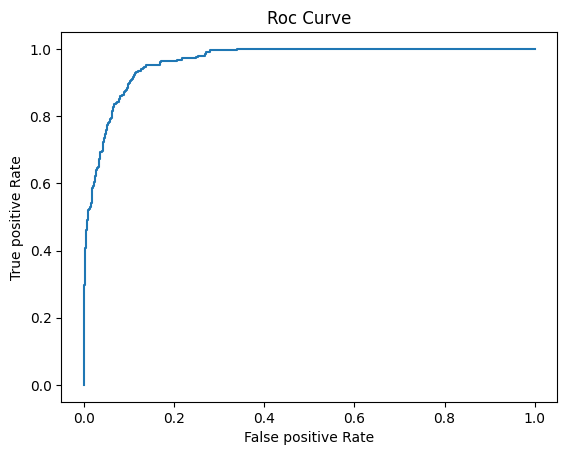

In [26]:
plt.plot(fpr, tpr)
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Roc Curve")
plt.show